In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from timeit import default_timer as timer

import sys
sys.path.append("..")

import helper.helper as h
import helper.methods as m

from notears.notears.notears import utils 

from importlib import reload  # Python 3.4+
reload(m)

<module 'helper.methods' from '..\\helper\\methods.py'>

In [ ]:
j = 0

In [97]:
# import matplotlib
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'Computer Modern',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
#     'font.size': 8,
#     'axes.unicode_minus' : False
# })

C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


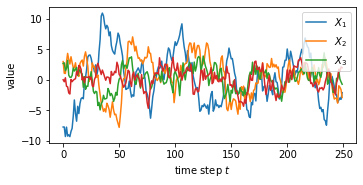

In [16]:
np.random.seed(seed = 1)

p, s, T = 4, 15, 250
# W_true = np.array([
#     [0.85, 0.0, 0.0, 0.0], 
#     [0.00, 0.85, 0.00, 0.00], 
#     [-0.38, 0.36, 0.85, 0.00],
#     [0.46, 0.00, 0.00, 0.85]])

# W_true = h.generate_var_2(T, p, low = 0.5, high = 0.75)
# for i in range(p):
#    W_true[i][i] = 0.7 + (i - p) / p * 0.3
    
X = h.generate_var_2(2 * T, p, W_true, np.identity(p))[-T:]

plt.figure(figsize = (5.5, 2.5));
plt.ylabel("value");
plt.xlabel(r"time step $t$");
plots = plt.plot(X);
l = ("$X_1$", "$X_2$", "$X_3$")
plt.legend(plots, labels = l, loc = 0)
# plt.ylim(-50, 25)
plt.show()


# j =  j + 1

# plt.xlabel(r"$k$, number of non-zero coefficients in $W^{(k)}$ obtained using $\texttt{DAG-OMP}$");
# plt.ylabel("mean squared error");
# W_KOMP, Ws, _ = m._K_OMP_output(X[:-1], X[1:], normalize = True, F = [])

# plt.ylim(8, 20);
# plt.plot([1 / (T - 1) * np.linalg.norm(X[1:] - X[:-1] @ W, 'f') ** 2 for W in Ws]);
# plt.savefig("bootstrapT.pgf", bbox_inches = 'tight')

In [4]:
np.random.seed(seed = 1)


p, s, T = 10, 15, 100
W_true = h.generate_A(p, s, low = 0.5, high = 0.5, tril = True)
for i in range(p):
    W_true[i][i] = 0.7 + (i - p) / p * 0.3
    
X = h.generate_var_2(3 * T, p, W_true, np.identity(p))[-T:]
# plt.plot(X);
# plt.show()

# j = j + 1
plt.figure(figsize = (5.5, 2.5));
plt.ylabel("mean squared error");
plt.xlabel(r"$k$, number of non-zero coefficients in $W^{(k)}$ obtained using $\texttt{DAG-OMP}$");
# plt.ylabel("mean squared error");
W_KOMP, Ws, _ = m._K_OMP_output(X[:-1], X[1:], normalize = True, F = [])

plt.ylim(8, 20);
plt.plot([1 / (T - 1) * np.linalg.norm(X[1:] - X[:-1] @ W, 'f') ** 2 for W in Ws]);
plt.savefig("1msetest.pgf", bbox_inches = 'tight')

ValueError: Seed must be between 0 and 2**32 - 1

0	10	20	30	40	50	60	70	80	90	

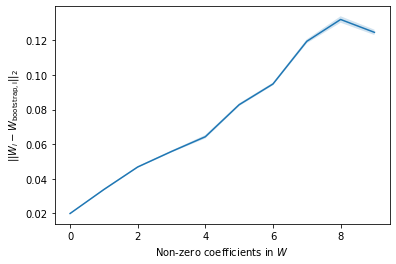

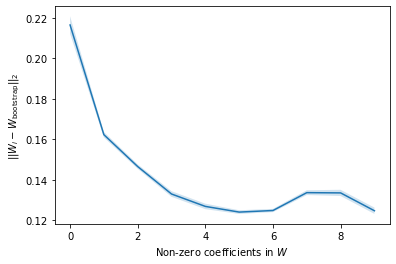

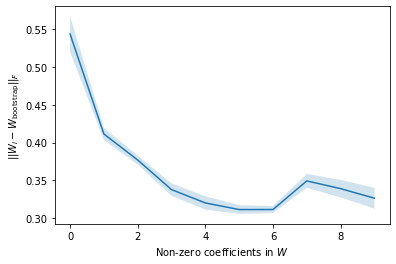

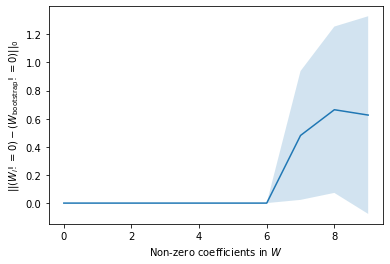

In [17]:
W_KOMP, Ws, _ = m._K_OMP_output(X[:-1], X[1:], normalize = True, F = [])

results = [[], [], [], []]
results_cov = [[], [], [], []]
bootstrap_Ws = []
iters = 50
for i, W in enumerate(Ws):
    if i == 0:
        results
    print(i * 100 // len(Ws), end = "\t")
    # get residuals
    residuals = X[1:] - X[:-1] @ W
    
#     print(np.mean(residuals, axis = 0))
#     print(np.cov(residuals.T))
    
    residuals -= np.mean(residuals, axis = 0)
    R = np.shape(residuals)[0]

    # Initialize series
    results_i = [[], [], [], []]
    for j in range(iters):
        X_bootstrap = h.generate_var_res(T, W, residuals)
        W_bootstrap, Ws_bootstrap, _ = m._K_OMP_output(X_bootstrap[:-1], X_bootstrap[1:], normalize = True, is_sem = False, F = [], output = True, verbose = False)
        bootstrap_Ws.append(W_bootstrap)
#         print(np.linalg.norm(W - Ws_bootstrap[i]))
        results_i[0].append(np.linalg.norm(W - Ws_bootstrap[i]))
        results_i[1].append(np.linalg.norm(W - W_bootstrap, 'f'))
        results_i[2].append(np.linalg.norm((W - W_bootstrap).flatten(), 1))
#         results_i[2].append(np.linalg.norm((W != 0) ^ (Ws_bootstrap[i] != 0)))
        results_i[3].append(np.linalg.norm((W > 0) ^ (Ws_bootstrap[i] > 0) + (W < 0) ^ (Ws_bootstrap[i]< 0)))
        
    results[0].append(sum(results_i[0]) / len(results_i[0]))
    results[1].append(sum(results_i[1]) / len(results_i[1]))
    results[2].append(sum(results_i[2]) / len(results_i[2]))
    results[3].append(sum(results_i[3]) / len(results_i[3]))
    
    results_cov[0].append(np.cov(np.array(results_i[0])))
    results_cov[1].append(np.cov(np.array(results_i[1])))
    results_cov[2].append(np.cov(np.array(results_i[2])))
    results_cov[3].append(np.cov(np.array(results_i[3])))

plt.xlabel("Non-zero coefficients in $W$")
plt.ylabel(r'||$W_i - W_{\mathrm{bootstrap, i}}||_2$')
plt.plot(results[0])
plt.fill_between(range(len(results[0])), np.array(results[0]) - 1 * np.array(results_cov[0]), np.array(results[0]) + 1 * np.array(results_cov[0]), alpha = 0.2)
plt.show()

plt.plot(results[1])
plt.xlabel("Non-zero coefficients in $W$")
plt.ylabel(r"$|| W_i - W_{\mathrm{bootstrap}} ||_2$")
plt.fill_between(range(len(results[1])), np.array(results[1]) - 1 * np.array(results_cov[1]), np.array(results[1]) + 1 * np.array(results_cov[1]), alpha = 0.2)
plt.show()

plt.plot(results[2])
plt.xlabel("Non-zero coefficients in $W$")
plt.ylabel(r"$|| W_i - W_{\mathrm{bootstrap}} ||_F$")
plt.fill_between(range(len(results[2])), np.array(results[2]) - 1 * np.array(results_cov[2]), np.array(results[2]) + 1 * np.array(results_cov[2]), alpha = 0.2)
plt.show()

plt.plot(results[3])
plt.xlabel("Non-zero coefficients in $W$")
plt.ylabel(r"$|| (W_i != 0) - (W_{\mathrm{bootstrap}} != 0) ||_0$")
plt.fill_between(range(len(results[3])), np.array(results[3]) - 1 * np.array(results_cov[3]), np.array(results[3]) + 1 * np.array(results_cov[3]), alpha = 0.2)
plt.show()

In [ ]:
def prediction_interval_W(Ws):
    
    means = np.mean(Ws, axis = 0)
    variances = np.zeros((p, p))
    
    for i in range(p):
        for j in range(p):
            variances[i][j] = np.cov(Ws[:, i, j])
    
    return means - 1.96 * variances, means + 1.96 * variances

W_KOMP, Ws, _ = m._K_OMP_output(X[:-1], X[1:], normalize = True, F = [])
W_1, W_2 = prediction_interval_W(np.array(bootstrap_Ws))
W_b = W_KOMP.copy()
print(np.round(W_1, 3))
print(np.round(W_2, 3))

for i in range(p):
    for j in range(p):
        if W_1[i][j] < 0 and W_2[i][j] > 0:
            W_b[i][j] = 0
            print(f"Edge ({i, j}) is considered unnecessary.")

-1	-1	-1	0	0	1	1	1	2	2	3	3	3	4	4	5	5	5	6	6	7	7	7	8	8	9	9	9	10	10	11	11	11	12	12	13	13	13	14	14	15	15	15	16	16	17	17	17	18	18	19	19	19	20	20	21	21	21	22	22	23	23	23	24	24	25	25	25	26	26	27	27	27	28	28	29	29	29	30	30	31	31	31	32	32	33	33	33	34	34	35	35	35	36	36	37	37	37	38	38	39	39	39	40	40	41	41	41	42	42	43	43	43	44	44	45	45	45	46	46	47	47	47	48	48	49	49	49	50	50	51	51	51	52	52	53	53	53	54	54	55	55	55	56	56	57	57	57	58	58	59	59	59	60	60	61	61	61	62	62	63	63	63	64	64	65	65	65	66	66	67	67	67	68	68	69	69	69	70	70	71	71	71	72	72	73	73	73	74	74	75	75	75	76	76	77	77	77	78	78	79	79	79	80	80	81	81	81	82	82	83	83	83	84	84	85	85	85	86	86	87	87	87	88	88	89	89	89	90	90	91	91	91	92	92	93	93	93	94	94	95	95	95	96	96	97	97	97	98	True Positive Rate: 1.0.
True Negative Rate: 1.0.
False Prediction Rate: 0.0
Accuracy: 1.0.
R-Squared: 0.874
Mean Squared Error: 4.211


[17.5041050883215,
 9.21769461066072,
 6.957940594328161,
 5.0633037945292205,
 4.814796014412933,
 4.49465773444744,
 4.268295307127888,
 4.3271396114035126,
 4.280133052383646,
 4.285688745106278]

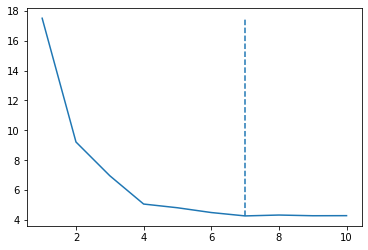

In [21]:
def k_fold_cv(X, fold_size, fold_iters):
    
    # number of timesteps
    T = np.shape(X)[0]
    
    # data set x, y
    x = X[:-1]
    y = X[1:]
    
    # do OMP, get Ws
    W, Ws, _ = m._K_OMP_output(x, y, normalize = True, F = [])
    
    # list for MSE
    mses = [[] for i in range(len(Ws))]

    # number of iterations for the fold
    for i in range(T - 1):
        print((i * 100) // T - 1, end = "\t")
        
        # random indices
        # idx = np.random.choice(range(T - 1), fold_size, replace = False)
    
        # train set x, y
        x_train = np.delete(x, i, axis = 0)
        y_train = np.delete(y, i, axis = 0)
    
        # do OMP
        W, Ws, _ = m._K_OMP_output(x_train, y_train, F = [], normalize = True)

        # compute cross-val-score
        for j, W in enumerate(Ws):
            mses[j].append(np.linalg.norm(y[i] - x[i] @ W, 2) ** 2)

    # mse averages
    mses_avg = [sum(mse) / len(mse) for mse in mses]
    
    
    plt.vlines(np.argmin(mses_avg) + 1, min(mses_avg), max(mses_avg), linestyle = '--')
    plt.plot(range(1, len(mses_avg) + 1), mses_avg)
    h.score(X, m._constrained_OLS(X, Ws[np.argmin(mses_avg)] != 0), W_true);
    
    return mses_avg
    
k_fold_cv(X, 10, 500)

In [23]:
def gen_var(W, T):
    p = np.shape(W)[0]
    noises = np.zeros((2 * T, p))
    
    X = np.zeros((2 * T, p))
    X[0] = np.random.multivariate_normal(np.zeros(p), np.identity(p))
    
    noises[1:] = np.random.multivariate_normal(np.zeros(p), np.identity(p), 2 * T - 1)
    
    for t in range(1, 2 * T):
        X[t] = X[t - 1] @ W + noises[t]
        
    return X[T:]

def gen_var_noises(W, T, noises):
    p = np.shape(W)[0]
    
    X = np.zeros((T, p))
    X[0] = noises[0]
    
    for t in range(1, T):
        X[t] = X[t - 1] @ W + noises[t]

    return X

def gen_var_noises_stat(W, T, noises):
    p = np.shape(W)[0]
    
    X = np.zeros((T, p))
    X[0] = noises[0]
    
    for t in range(1, T):
        X[t] = X[t - 1] @ W + noises[t]

    return X[T // 2:]

[[ 0.6    0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.6    0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.6    0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.722  0.     0.6    0.     0.     0.     0.     0.     0.   ]
 [-0.723  0.623  0.     0.     0.6    0.     0.     0.     0.     0.   ]
 [ 0.     0.757  0.     0.     0.     0.6    0.     0.     0.     0.   ]
 [ 0.     0.     0.55   0.     0.     0.     0.6    0.     0.     0.   ]
 [ 0.462  0.     0.517 -0.42   0.     0.     0.     0.6    0.     0.   ]
 [-0.769  0.     0.     0.736  0.     0.    -0.559  0.651  0.6    0.   ]
 [-0.763  0.    -0.411  0.772  0.     0.     0.     0.     0.     0.6  ]]


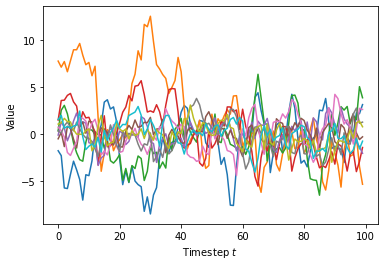

In [25]:
np.random.seed(seed = 12345)

# Number of dimensions, number of edges, number of samples
T, p, s = 100, 10, 15
N = int(p * (p + 1) / 2)

### Coefficient matrix
W_true = h.generate_A(p, s, tril = True, low = 0.4, high = 0.80)

for i in range(p):
    W_true[i][i] = 0.6 # np.abs(A_true[i][i])

s = len(W_true.flatten().nonzero()[0])

## Generate series
X = gen_var(W_true, 2 * T)[T:]
print(np.round(W_true, 3))
## Plot series
plt.xlabel(r"Timestep $t$")
plt.ylabel(r"Value")
plots = plt.plot(X); 

plt.ylim(8, 20)
# ## Plot series
# fig = plt.figure(figsize = (5.5, 3))
# fig.patch.set_alpha(0)
# plt.xlabel(r"Timestep $t$")
# plt.ylabel(r"Value")
# plots = plt.plot(X); 
# plt.legend(plots, [r"$X_1$", r"$X_2$", r"$X_3$"], loc = 1);
# plt.savefig('figure exhaustive example.pgf')

-1	0	1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	26	27	28	29	30	31	32	33	34	35	36	37	38	39	40	41	42	43	44	45	46	47	48	49	50	51	52	53	54	55	56	57	58	59	60	61	62	63	64	65	66	67	68	69	70	71	72	73	74	75	76	77	78	79	80	81	82	83	84	85	86	87	88	89	90	91	92	93	94	95	96	97	True Positive Rate: 1.0.
True Negative Rate: 1.0.
False Prediction Rate: 0.0
Accuracy: 1.0.
R-Squared: 0.829
Mean Squared Error: 10.16


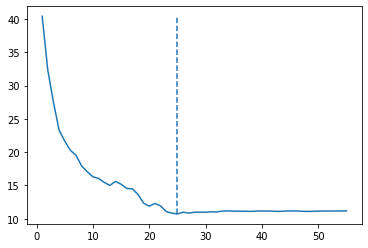

In [27]:
mses = k_fold_cv(X, 10, 500)

In [50]:
import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'Computer Modern',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'font.size': 8,
    'axes.unicode_minus' : False
})

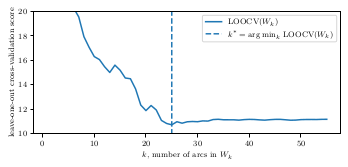

In [54]:
plt.figure(figsize=(5.5, 2.25))
plt.ylabel("leave-one-out cross-validation score")
plt.xlabel(r"$k$, number of arcs in $W_k$")
plt.ylim(10, 20)
plt.vlines(np.argmin(mses) + 1, min(mses) - 10, max(mses), linestyle = '--', label = r"$k^* = {\arg \min}_k$ LOOCV$(W_k)$")
plt.plot(range(1, len(mses) + 1), mses, label = "LOOCV$(W_k)$")
plt.legend()
plt.savefig("loocvex2.pgf", bbox_inches = 'tight')